In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.chdir("..")

import numpy as np
import matplotlib.pyplot as plt
import cv2
from pathlib import Path
from src.utils.plotting import make_matching_figure, error_colormap

In [2]:
def make_prediction_and_evaluation_plot(root_dir, pe, path=None, source='ScanNet'):
    img0 = cv2.imread(str(root_dir / pe['pair_names'][0]), cv2.IMREAD_GRAYSCALE)
    img1 = cv2.imread(str(root_dir / pe['pair_names'][1]), cv2.IMREAD_GRAYSCALE)
    if source == 'ScanNet':
        img0 = cv2.resize(img0, (640, 480))
        img1 = cv2.resize(img1, (640, 480))

    thr = 5e-4
    mkpts0 = pe['mkpts0_f']
    mkpts1 = pe['mkpts1_f']
    color = error_colormap(pe['epi_errs'], thr, alpha=0.3)

    text = [
        f"LoFTR",
        f"#Matches: {len(mkpts0)}",
        f"$\\Delta$R:{pe['R_errs']:.2f}°,  $\\Delta$t:{pe['t_errs']:.2f}°",
    ]

    if path:
        make_matching_figure(img0, img1, mkpts0, mkpts1, color, text=text, path=path)
    else:
        return make_matching_figure(img0, img1, mkpts0, mkpts1, color, text=text)

## Visualization on ScanNet
- Prediction and Evaluation

In [3]:
root_dir = Path("data/scannet/test")  # Scannet
npy_path = "dump/loftr_ds_indoor/LoFTR_pred_eval.npy"
dumps = np.load(npy_path, allow_pickle=True)

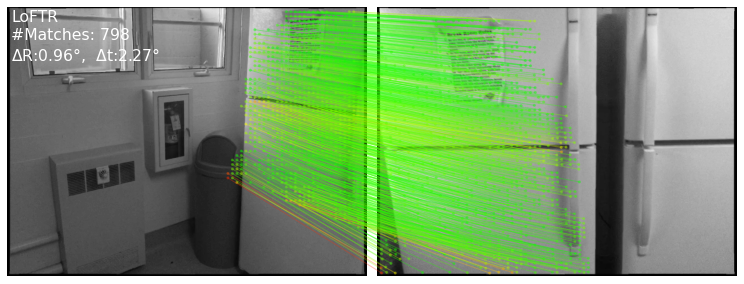

In [4]:
fig = make_prediction_and_evaluation_plot(root_dir, dumps[2], source='ScanNet')

## Visualization on MegaDepth
- Prediction and Evaluation

In [5]:
root_dir = Path("data/megadepth/test")  # MegaDepth
npy_path = "dump/loftr_ds_outdoor/LoFTR_pred_eval.npy"
dumps = np.load(npy_path, allow_pickle=True)

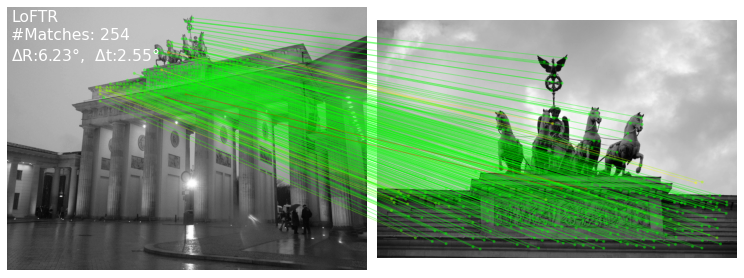

In [6]:
fig = make_prediction_and_evaluation_plot(root_dir, dumps[51], source='MegaDepth')